In [2]:
import numpy as np
from numpy.linalg import det
from numpy.linalg import inv
from numpy import mat
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import random
from numpy import genfromtxt
import math


def get_data():
    data=load_svmlight_file(r"D:\housing_scale.txt")
    return data[0],data[1]

def add_bias(matrix):
    bias=[]
    for i in range(matrix.shape[0]):
        bias.append(1)
    matrix=np.column_stack((bias,matrix))
    return matrix

def batchGradientDescent(X_test,y_test,x, y, lambda1, theta, alpha,m, maxIterations):
    theta=np.zeros((x.shape[1],1))
    Jtest_history=np.zeros(maxIteration)
    J_history=np.zeros(maxIterations)
    xTrains = x.transpose()
    m_train=x.shape[0]
    m_test=X_test.shape[0]
    for i in range(maxIterations):
        J_history[i]=computerLoss(x,y,theta,lambda1,m_train)
        Jtest_history[i]=computerLoss(X_test,y_test,theta,lambda1,m_test)
        deta_theta=np.zeros((1,x.shape[1]))
        hypothesis1 = np.dot(lambda1,theta)#(14,1) lam*w
        hy2=np.dot(x,theta)#(379,1),x*w
        hy3=y-hy2#y-x*w
        hy4=np.dot(xTrains,hy3)#(14,1) x'(y-x*w)
        gradient =hypothesis1-hy4 ##l*w-x'*y+x'x*w G
        negative_grad=hy4-hypothesis1#G'
        theta = theta + alpha * negative_grad/m_train#w+n*(x'y-x'x*w-l*w)
    return theta,J_history,Jtest_history

def computerLoss(x,y,theta,lamda1,m):
    R=lamda1*1.0/(2*m)*np.sum(np.square(theta))
    J=(1.0/(2*m))*np.sum(np.square(x.dot(theta)-y))+R
    return J

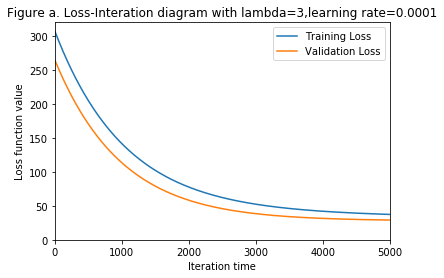

In [7]:
#first
#get data set
X,y=get_data()
X=X.todense()
#split data set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
#deal with train label and test label
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)

#get a shape of X train
m, n = np.shape(X_train)
#initialize parameter
lambda1=3
theta = np.zeros(n)
alpha = 0.0001#learning rate
maxIteration = 5000
#add bias
X_train=add_bias(X_train)
X_test=add_bias(X_test)
#update theta,count train loss, validation loss
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print diagram
%matplotlib inline
plt.xlim(0,5000)
plt.ylim(0,320)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure a. Loss-Interation diagram with lambda=3,learning rate=0.0001')
plt.legend()
plt.show()

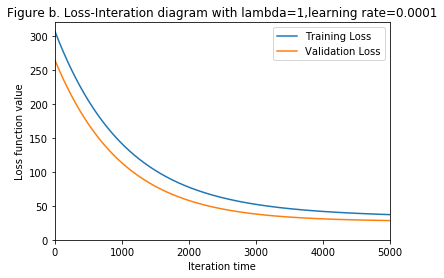

In [9]:
#second
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)
#train
m, n = np.shape(X_train)
lambda1=1
theta = np.ones(n)
alpha = 0.0001
maxIteration = 5000
X_train=add_bias(X_train)
X_test=add_bias(X_test)
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print diagram
%matplotlib inline
plt.xlim(0,5000)
plt.ylim(0,320)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure b. Loss-Interation diagram with lambda=1,learning rate=0.0001')
plt.legend()
plt.show()

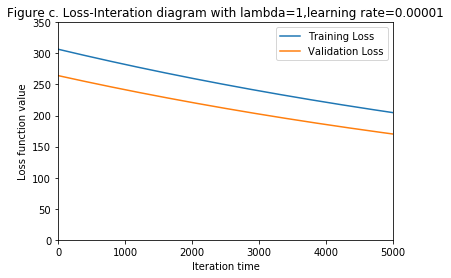

In [10]:
#third
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)
#train
m, n = np.shape(X_train)
lambda1=1
theta = np.ones(n)
alpha = 0.00001
maxIteration = 5000
X_train=add_bias(X_train)
X_test=add_bias(X_test)
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print diagram
%matplotlib inline
plt.xlim(0,5000)
plt.ylim(0,350)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure c. Loss-Interation diagram with lambda=1,learning rate=0.00001')
plt.legend()
plt.show()

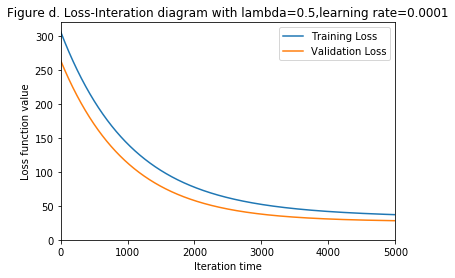

In [11]:
#fourth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)
#train
m, n = np.shape(X_train)
lambda1=0.5
theta = np.ones(n)
alpha = 0.0001
maxIteration = 5000
X_train=add_bias(X_train)
X_test=add_bias(X_test)
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print diagram
%matplotlib inline
plt.xlim(0,5000)
plt.ylim(0,320)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure d. Loss-Interation diagram with lambda=0.5,learning rate=0.0001')
plt.legend()
plt.show()

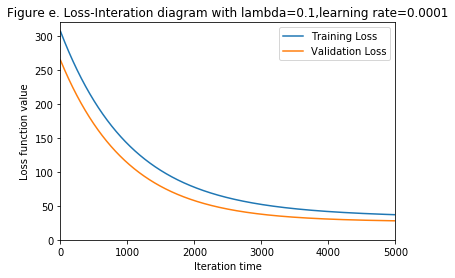

In [12]:
#fifth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)
#train
m, n = np.shape(X_train)
lambda1=0.1
theta = np.ones(n)
alpha = 0.0001
maxIteration = 5000
X_train=add_bias(X_train)
X_test=add_bias(X_test)
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print diagram
%matplotlib inline
plt.xlim(0,5000)
plt.ylim(0,320)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure e. Loss-Interation diagram with lambda=0.1,learning rate=0.0001')
plt.legend()
plt.show()

result [[ 29.15396827  35.47921467  15.66740161  25.12358194  19.01274143
   23.37915846  17.65766519  13.84636887  23.26010604  20.88194925
   24.50447466  19.06340662  -7.78103182  21.96534547  19.51155879
   26.16445557  19.46989198   5.5643656   39.74194892  17.73522679
   26.89654007  29.53227552  11.23179648  23.87745122  18.10583815
   16.0062832   23.12969998  14.14501589  22.16566382  19.56733723
   22.67678897  25.31708735  25.25678404  18.73013535  16.70747815
   17.44426307  31.22625586  20.25312986  23.49200654  24.54934174
   14.1600183   31.56619693  41.390328    17.79389611  27.39060334
   17.33346651  14.07980134  25.80139476  20.47154238  30.51701635
   21.81904716  34.1141444   15.92214503  26.36573172  39.36968193
   22.99196591  19.16474806  31.84389765  25.06709363  13.22181589
   22.66458701  29.85588373  31.52236582  16.02690723  21.24761959
   16.44757709  20.47934085  25.93886307  30.06948102  11.59542941
   20.40311237  27.66772293  10.7631541   16.21892785  

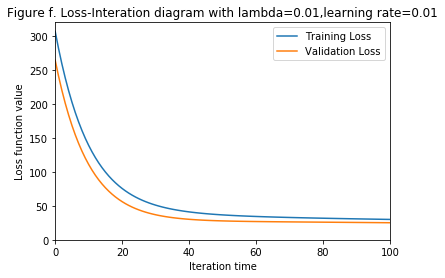

In [15]:
#fixth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
y_train=np.asmatrix(y_train)
y_train= np.transpose(y_train)
y_test=np.asmatrix(y_test)
y_test= np.transpose(y_test)
#train
m, n = np.shape(X_train)
lambda1=0.01
theta = np.ones(n)
alpha = 0.01
maxIteration = 5000
X_train=add_bias(X_train)
X_test=add_bias(X_test)
theta,Cost_J,Cost_Jtest= batchGradientDescent(X_test,y_test,X_train, y_train, lambda1, theta, alpha, m, maxIteration)
#print predict
result=np.zeros_like((y_test))
result=np.dot(X_test,theta)
print("result",result.transpose())
#print diagram
%matplotlib inline
plt.xlim(0,100)
plt.ylim(0,320)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with lambda=0.01,learning rate=0.01')
plt.legend()
plt.show()
